In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
df = pd.read_csv('cardio_train.csv', sep=';')
df = df.dropna()
print(df.shape)
print(list(df.columns))

(70000, 13)
['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


In [4]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

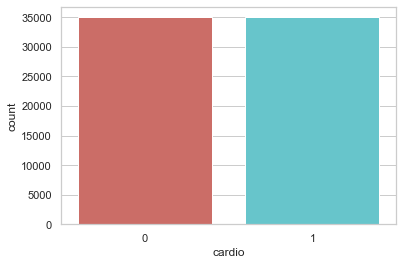

<Figure size 432x288 with 0 Axes>

In [10]:
sns.countplot(x='cardio', data=df, palette='hls')
plt.show()
plt.savefig('count_plot')

In [14]:
count_no_sub = len(df[df['cardio']==0])
count_sub = len(df[df['cardio']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of NEGATIVE cardiovascular risk is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of POSITIVE cardiovascular risk is", pct_of_sub*100)

percentage of NEGATIVE cardiovascular risk is 50.029999999999994
percentage of POSITIVE cardiovascular risk is 49.97


In [16]:
df.groupby('cardio').mean()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
cardio,,,,,,,,,,,,
0,49862.869107,18881.623711,1.345707,164.448017,71.592150,120.432598,84.251763,1.216527,1.175380,0.092516,0.055424,0.817881
1,50082.102233,20056.813031,1.353441,164.270334,76.822368,137.212042,109.023929,1.517396,1.277595,0.083736,0.052117,0.789559


In [17]:
df.groupby('gender').mean()

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
gender,,,,,,,,,,,,
1,49898.345267,19510.124577,161.355612,72.565605,128.139249,94.522776,1.384735,1.235054,0.017856,0.025500,0.802021,0.496727
2,50110.246547,19392.097875,169.947895,77.257307,130.078872,100.551982,1.333633,1.210462,0.218880,0.106375,0.806906,0.505231


In [18]:
df.groupby('cholesterol').mean()

,id,age,gender,height,weight,ap_hi,ap_lo,gluc,smoke,alco,active,cardio
cholesterol,,,,,,,,,,,,
1,49883.917381,19283.308084,1.359168,164.590283,73.053862,126.608705,93.733741,1.099093,0.085196,0.048067,0.802367,0.440107
2,50064.959682,19604.875799,1.329459,163.880406,76.666464,134.788250,105.838098,1.335218,0.105666,0.076134,0.799037,0.602157
3,50437.649516,20512.962311,1.311059,163.425490,78.773085,136.092239,104.542400,1.924870,0.086412,0.064344,0.818125,0.765435


In [19]:
df.groupby('smoke').mean()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,alco,active,cardio
smoke,,,,,,,,,,,,
0,50005.59844,19505.400730,1.299447,163.879416,73.902352,128.861431,96.326550,1.364682,1.227303,0.029923,0.800536,0.502107
1,49629.11963,19090.836927,1.868212,169.323877,77.344351,128.360512,99.774518,1.389528,1.217701,0.300535,0.836764,0.474793


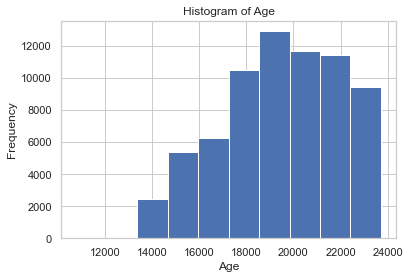

In [20]:
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

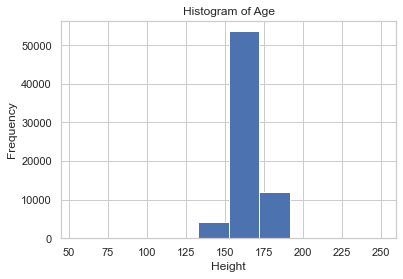

In [21]:
df.height.hist()
plt.title('Histogram of Age')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.savefig('hist_age')

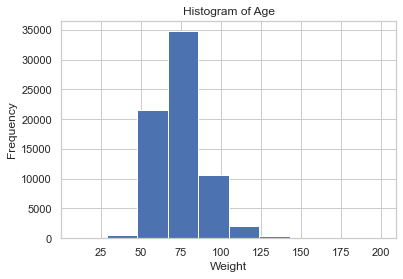

In [22]:
df.weight.hist()
plt.title('Histogram of Age')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.savefig('hist_age')

# Create dummy variables

In [26]:
cat_vars=['gluc', 'smoke', 'alco', 'active']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data1=df.join(cat_list)
    data=data1
cat_vars=['gluc', 'smoke', 'alco', 'active']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [27]:
data_final=df[to_keep]
data_final.columns.values

array(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'cardio'], dtype=object)

# Oversampling with SMOTE

In [34]:
import imblearn
print(imblearn.__version__)

ModuleNotFoundError: No module named 'imblearn'

In [33]:
X = data_final.loc[:, data_final.columns != 'cardio']
y = data_final.loc[:, data_final.columns == 'cardio']

    from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

ModuleNotFoundError: No module named 'imblearn'